<a href="https://colab.research.google.com/github/dushyanthbommana/CE888/blob/main/LAB7/Exercise_1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First CNN model for MNIST Dataset

* MNIST Dataset is ''Hello World'' of Image Recognition

* [Dataset HomePage](http://yann.lecun.com/exdb/mnist/)

* History of MNIST Dataset [Watch here](https://www.youtube.com/watch?v=oKzNUGz21JM)


---
The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a 
test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.

![Kitten](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)


# Let's start building our first CNN Model

In [1]:
from keras import layers
from keras import models

Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension). In this case, we’ll configure
the convnet to process inputs of size (28, 28, 1), which is the format of MNIST
images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first
layer.

#### Instantiating a small convnet

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


#### Adding a classifier on top of the convnet

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

### Training the convnet on MNIST images

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load Data

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


#### compile and fit model 

In [6]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 36s 5ms/step - loss: 0.4683 - accuracy: 0.8500 - val_loss: 0.0675 - val_accuracy: 0.9808
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0585 - accuracy: 0.9812 - val_loss: 0.0601 - val_accuracy: 0.9822
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0403 - accuracy: 0.9879 - val_loss: 0.0501 - val_accuracy: 0.9859
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0258 - accuracy: 0.9921 - val_loss: 0.0381 - val_accuracy: 0.9891
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0197 - accuracy: 0.9932 - val_loss: 0.0468 - val_accuracy: 0.9867


#### evaluate model

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.0386 - accuracy: 0.9894


0.9894000291824341

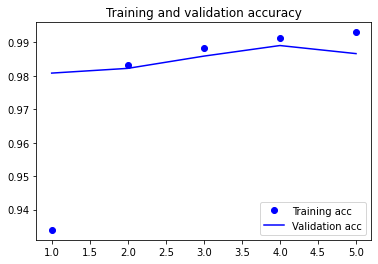

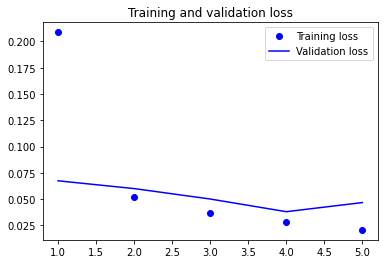

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Task 1

Change the activation function and other parameters such as optimizer to see the effect on the network and it's performance. If possible create a grid search. 

In [9]:
# Write code here

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
  model1 = Sequential()
  model1.add(layers.Conv2D(32, (3, 3), activation='elu', input_shape=(28, 28, 1)))
  model1.add(layers.MaxPooling2D((2, 2)))
  model1.add(layers.Conv2D(64, (3, 3), activation='elu'))
  model1.add(layers.MaxPooling2D((2, 2)))
  model1.add(layers.Conv2D(64, (3, 3), activation='elu'))
  model1.add(layers.Flatten())
  model1.add(layers.Dense(64, activation='elu'))
  model1.add(layers.Dense(10, activation='softmax'))
  model1.compile( 
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy'],
        )    
  return model1
cnn=create_model()
cnn.compile(
  optimizer='adam',
  loss='categorical_crossentropy',  
  metrics=['accuracy'],
)
cnn.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [11]:
# fix random seed for reproducibility
import numpy as np
seed = 7
np.random.seed(seed)
# load dataset
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [12]:
history = cnn.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 4s 4ms/step - loss: 0.4077 - accuracy: 0.8755 - val_loss: 0.0759 - val_accuracy: 0.9771
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0593 - accuracy: 0.9817 - val_loss: 0.0563 - val_accuracy: 0.9822
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0422 - accuracy: 0.9858 - val_loss: 0.0531 - val_accuracy: 0.9844
Epoch 4/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0314 - accuracy: 0.9894 - val_loss: 0.0587 - val_accuracy: 0.9839
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0233 - accuracy: 0.9923 - val_loss: 0.0605 - val_accuracy: 0.9847


In [13]:
# create model
mdl = KerasClassifier(build_fn=create_model, verbose=1)
# define parameters and values for grid search 
param_grid = {
    'batch_size': [25,32],
    'optimizer': ['SGD', 'Adagrad'],    
    'epochs': [5,10]
}

In [16]:
pip install grid_search

ERROR: Could not find a version that satisfies the requirement sklearn.grid_search (from versions: none)
ERROR: No matching distribution found for sklearn.grid_search


In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
grid = GridSearchCV(estimator=mdl, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(train_images,train_labels)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/10
2400/2400 [==============================] - 7s 3ms/step - loss: 0.6864 - accuracy: 0.8094
Epoch 2/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.1086 - accuracy: 0.9678
Epoch 3/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0724 - accuracy: 0.9776
Epoch 4/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0524 - accuracy: 0.9838
Epoch 5/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0470 - accuracy: 0.9855
Epoch 6/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0391 - accuracy: 0.9882
Epoch 7/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0359 - accuracy: 0.9888
Epoch 8/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0337 - accuracy: 0.9898
Epoch 9/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.0287 - accuracy: 0.9909
Epoch 10/10
2400/2400 [==============================] - 6s 3ms/step - loss: 0.024

In [18]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.984117 using {'batch_size': 25, 'epochs': 10, 'optimizer': 'SGD'}
0.979500 (0.000324) with: {'batch_size': 25, 'epochs': 5, 'optimizer': 'SGD'}
0.933150 (0.003512) with: {'batch_size': 25, 'epochs': 5, 'optimizer': 'Adagrad'}
0.984117 (0.000641) with: {'batch_size': 25, 'epochs': 10, 'optimizer': 'SGD'}
0.952550 (0.004880) with: {'batch_size': 25, 'epochs': 10, 'optimizer': 'Adagrad'}
0.976950 (0.001105) with: {'batch_size': 32, 'epochs': 5, 'optimizer': 'SGD'}
0.927650 (0.001251) with: {'batch_size': 32, 'epochs': 5, 'optimizer': 'Adagrad'}
0.982050 (0.001098) with: {'batch_size': 32, 'epochs': 10, 'optimizer': 'SGD'}
0.949550 (0.001512) with: {'batch_size': 32, 'epochs': 10, 'optimizer': 'Adagrad'}
